## 분류 Classification
+ Naive Bayes
+ Logistic Regression
+ Decision Tree
+ Support Vector Machine
+ Nearest Neighbor
+ Neural Network
+ Ensemble

## 앙상블 방법
+ Bagging
+ Boosting

앙상블의 기본 알고리즘으로 보통 결정 트리를 사용한다.

예측 성능을 향상시키기 위해 복잡한 모델 구조를 사용하다보면 과적합이 발생할 수 있다.

앙상블은 여러 개의 약한 학습기를 결합하여 예측 성능을 향상시킴으로써 이를 보완할 수 있다.

### 결정 트리

결정 트리는 정보 균일도가 높은 것을 기준으로 서브 데이터 세트를 만든다.

정보의 균일도를 측정하는 기준
+ 정보 이득 : (1-엔트로피 지수)가 높은 속성을 기준으로 분할
+ 지니 계수 : 낮은 속성을 기준으로 분할

장점 : 직관적이고 균일도만 신경 쓰면 된다.

단점 : 과적합으로 정확도가 떨어진다.

Graphviz 이용하여 결정 트리 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

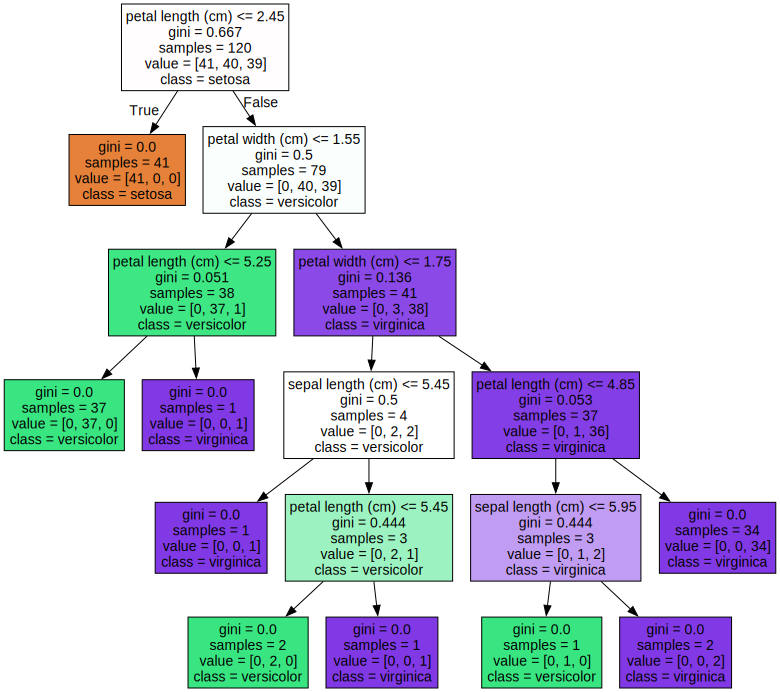

In [4]:
import graphviz

with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

max_depth, min_samples_split, min_samples_leaf 등 하이퍼 파라미터를 조절하여 depth 설정

feature 별 중요도 추출

Feature imporances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) :  0.025
sepal width (cm) :  0.000
petal length (cm) :  0.555
petal width (cm) :  0.420


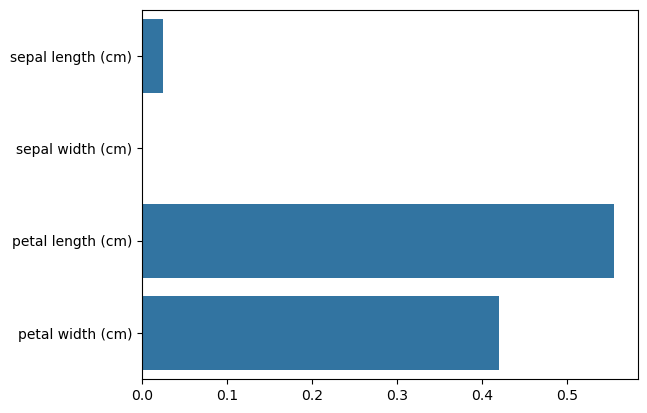

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print("Feature imporances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1: .3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()

결정 트리 과적합

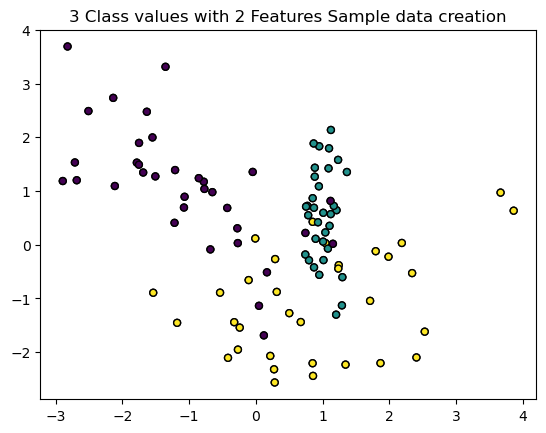

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:,1], marker='o',c=y_labels, s=25, edgecolor='k')

plt.show()

In [17]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    plt.show()

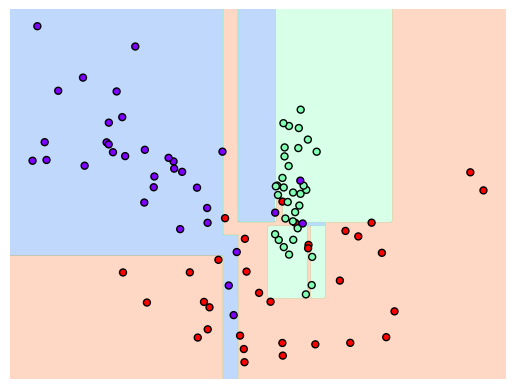

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치로 인해 결정 기준 경계가 많은 것을 확인

6개 이하의 데이터는 리프 노드를 생성할 수 있도록 생성 규칙을 완화한 후 결정 기준 경계 확인

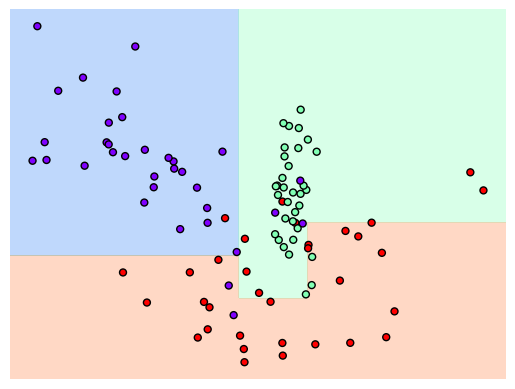

In [19]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\SM-PC\AppData\Local\Temp\ipykernel_29268\707016986.py:5: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축 값으로 되어 있다.

또한 중복된 피처명이 있으므로 이를 확인 후 수정한다.

In [2]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


동일한 컬럼 이름을 가진 행들을 그룹화한 다음 카운트하여 1 초과인 컬럼명들을 출력한다.

총 42개의 피처명이 중복되어 있다.

In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [4]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\SM-PC\AppData\Local\Temp\ipykernel_29268\4149440261.py:6: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
C:\Users\SM-PC\AppData\Local\Temp\ipykernel_29268\4149440261.py:16: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
C:\Users\SM-PC\AppData\Local\Temp\ipykernel_29268\4149440261.py:17: SyntaxWarning: invalid escape seq

In [5]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [6]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


레이블은 1, 2, 3, 4, 5, 6의 6개 값이고 비교적 고르게 분포되었다.

DecisionTreeClassifier를 이용해 동작 예측 분류 수행

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


현재 예측 정확도는 약 85.48%이다.

결정 트리의 트리 깊이가 예측 정확도에 주는 영향을 살펴본다.

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


최적은 max_depth=8 일 때로, 5개의 폴드 세트의 최고 평균 정확도 결과는 약 85.49%이다.

다른 max_depth에 따른 평가 데이터 세트의 평균 정확도 수치를 추출해서 확인해 본다.

In [11]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


검증 데이터 세트에서는 과적합으로 인한 성능 저하를 확인할 수 있다.

별도의 테스트 데이터 세트에서의 정확도와 비교해 본다.

In [14]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


max_depth=8일 경우 87.17%로 가장 높은 정확도를 나타낸다. GridSearchCV와 마찬가지로 깊이가 깊어질수록 정확도가 떨어진다.

max_depth, min_samples_split을 변경하면서 정확도 성능을 튜닝해본다.

In [15]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


최고 정확도는 max_depth=8, min_samples_split=16일 때 85.49%가 출력된다.

해당 파라미터를 테스트 데이터 세트에 적용한다.

In [16]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


테스트 데이터 세트의 예측 정확도는 약 87.17%이다.

이제 결정 트리에서 각 피처의 중요도를 알아본다.

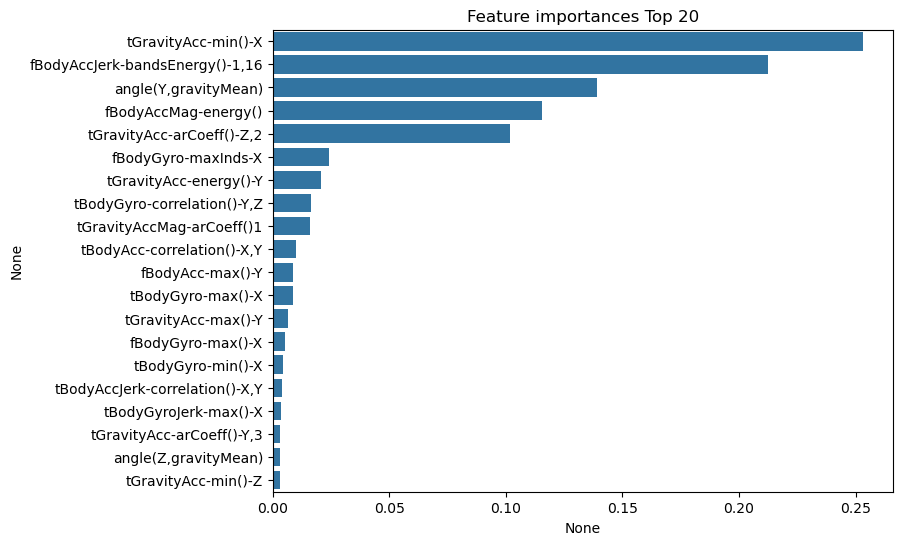

In [20]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 앙상블 학습

+ Voting : 서로 다른 알고리즘을 가진 분류기 결합
+ Bagging : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이나, 데이터 샘플링을 다르게 함. 예) 랜덤 포레스트
+ Boosting : 여러 개의 분류기가 순차적으로 학습을 수행하되, 다음 분류기에는 가중치를 부여하여 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록 함.
+ Stacking : 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측.
  

### 위스콘신 유방암 데이터 예측

In [20]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [22]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅으로 무조건 정확도가 높아지는 것은 아니므로.. 

어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 ML 모델의 중요한 평가 요소가 됨.

편향-분산 트레이드 오프는 ML 모델이 극복해야 할 중요 과제.

결정 트리 알고리즘의 장점을 그대로 사용하고 단점은 보완하면서 편향-트레이드오프의 효과를 극대화할 수 있음.

## 렌덤 포레스트

배깅의 대표적인 알고리즘

앙상블 알고리즘 중 비교적 빠른 수행 속도를 가짐.

기반 알고리즘 : 결정 트리

### bootstrapping 분할 방식
여러 개의 데이터 세트를 중첩되게 분리하는 것

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트이다.

앞서 결정 트리 예측에 사용하였던 사용자 행동 인식 데이터 세트를 사용하여 정확도를 확인해 본다.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


약 91.96%로 앞서 결정 트리의 예측 정확도인 87.17%보다 높다

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해본다.

In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24], 
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


max_depth=16, min_samples_leaf=6, min_samples_split=2 일 때 가장 높은 평균 정확도가 출력된다.

이렇게 추출한 하이퍼 파라미터로 다시 학습시킨 뒤, 테스트 데이터 세트에서 예측 성능을 측정한다.

In [22]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_leaf=6, \
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


피처 중요도를 출력한다.

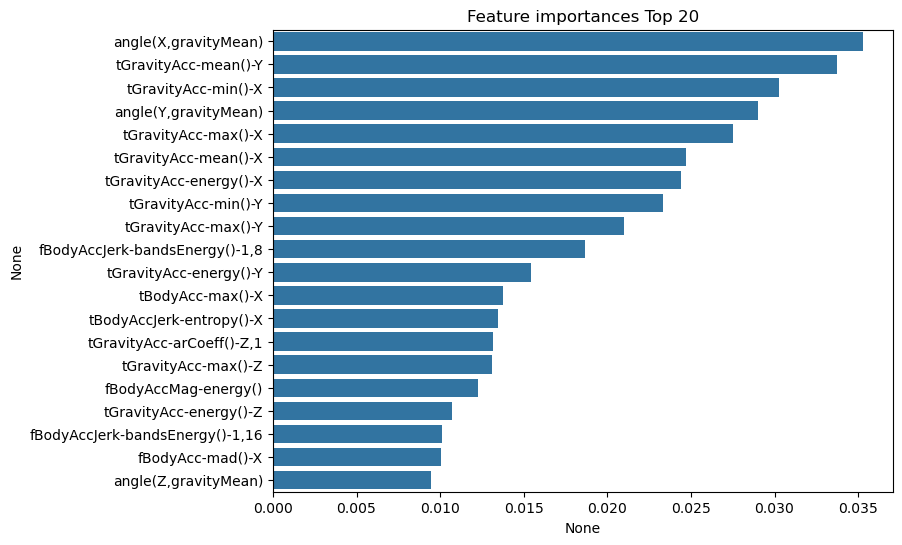

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

## GBM Gradient Boosting Machine

부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
+ AdaBoost (Adaptive boosting) : 오류 데이터에 가중치 부여
+ Gradient Boost : 가중치 업데이트에 경사 하강법 이용

경사 하강법 Gradient Descent : 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트함.

앞서 랜덤 포레스트에서도 사용한 사용자 행동 데이터 세트를 예측 분류해 본다.

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()  # 수행 시간 측정

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

KeyboardInterrupt: 

너무 오래걸려서 중단

약 93.89%로 앞의 랜덤 포레스트보다 나은 예측 성능을 보인다.

보통 GBM이 더 나은 성능을 보이나, 수행 시간이 오래 걸린다는 문제점이 있다.

약한 학습기의 순차적인 예측 오류 보정을 수행하기 때문에 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않기 때문이다.

### GBM 하이퍼 파라미터

+ loss : 비용 함수 지정. 기본값 'deviance'
+ learning_rate : weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. 학습률. n_estimators와 상호 보완적으로 조합하여 사용.
+ n_estimators : weak learner의 개수
+ subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1로, 전체 학습 데이터를 기반으로 학습한다는 의미.